# kmeans用于图像压缩

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd

# 1load image as ndarray

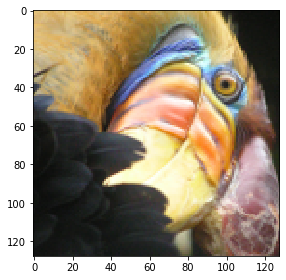

In [16]:
from skimage import io

# cast to float, you need to do this, otherwise the color would be weird after clustring
pic = io.imread('data/bird_small.png') / 255
io.imshow(pic)

In [17]:
pic.shape

(128, 128, 3)

In [18]:
# serialize data
data = pic.reshape(128 * 128, 3)

# let's do k-means

> my version will take more than 10 mins... ok. I know why I shouldn't implement my own ML library.  
> In the future I will only implement ML algorithm for the sake of learning it XD

In [19]:
def k_means(data, k, epoch=100, n_init=10):
    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])
    
    least_cost_idx = np.argmin(tries[:, -1])
    
    return tries[least_cost_idx]

In [21]:
# support fn ---------------
def combine_data_C(data, C):
    data_with_c = data.copy()
    data_with_c['C'] = C
    return data_with_c

# k-means fn ----------------
def random_init(data, k):
    # choose k sample from data set as init centroids
    # Args: data: DateFrame k: int
    # Return: k smaples: ndarray
    
    return data.sample(k).values

def _find_your_cluster(x, centroids):
    distances = np.apply_along_axis(func1d=np.linalg.norm, axis=1, arr=centroids - x)
    
    return np.argmin(distances)

def assign_cluster(data, centroids):
    # assign cluster for each node in data return C ndarray
    
    return np.apply_along_axis(lambda x: _find_your_cluster(x, centroids), axis=1, arr=data.values)

def new_centroids(data, C):
    data_with_c = combine_data_C(data, C)
    
    return data_with_c.groupby('C', as_index=False).mean().sort_values(by='C').drop('C', axis=1).values

def cost(data, centroids, C):
    m = data.shape[0]
    
    expand_C_with_centroids = centroids[C]
    
    distances = np.apply_along_axis(func1d=np.linalg.norm, axis=1, arr=data.values - expand_C_with_centroids)
    
    return distances.sum() / m

def _k_means_iter(data, k, epoch=100, tol=0.0001):
    centroids = random_init(data, k)
    cost_progress = []
    
    for i in range(epoch):
        print('running epoch{}'.format(i))
        
        C = assign_cluster(data, centroids)
        centroids = new_centroids(data, C)
        cost_progress.append(cost(data, centroids, C))
        
        if len(cost_progress) > 1:
            if(np.abs(cost_progress[-1] - cost_progress[-2])) / cost_progress[-1] < tol:
                break
        
    return C, centroids, cost_progress[-1]

def k_means(data, k, epoch=100, n_init=10):
    tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])
    
    least_cost_idx = np.argmin(tries[:,-1])
    
    return tries[least_cost_idx]

In [22]:
C, centroids, cost = k_means(pd.DataFrame(data), 16, epoch = 10, n_init=3)

running epoch0
running epoch1
running epoch2
running epoch3
running epoch4
running epoch5
running epoch6
running epoch7
running epoch8
running epoch9
running epoch0
running epoch1
running epoch2
running epoch3
running epoch4
running epoch5
running epoch6
running epoch7
running epoch8
running epoch9
running epoch0
running epoch1
running epoch2
running epoch3
running epoch4
running epoch5
running epoch6
running epoch7
running epoch8
running epoch9


C:\Users\yzj\AppData\Local\Temp/ipykernel_7864/636682977.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tries = np.array([_k_means_iter(data, k, epoch) for _ in range(n_init)])


# sklearn KMeans

In [24]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=16, n_init=100)

In [25]:
model.fit(data)

KMeans(n_clusters=16, n_init=100)

In [26]:
centroids = model.cluster_centers_
print(centroids.shape)

C = model.predict(data)
print(C.shape)

(16, 3)
(16384,)


In [27]:
centroids[C].shape

(16384, 3)

In [28]:
compressed_pic = centroids[C].reshape((128, 128, 3))

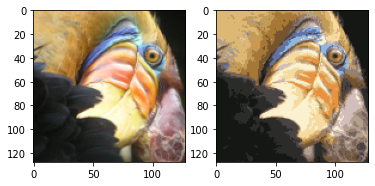

In [29]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(compressed_pic)
plt.show()